<a href="https://colab.research.google.com/github/wojwozniak/university/blob/master/Machine_Learning/List01/List01Task02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1 of [first UWr_ML_2024 homework](https://github.com/wojwozniak/university/blob/master/Machine_Learning/List01/Homework_1.pdf)

Let's start by importing required libraries and loading the dataset
(dataset is availible by default in tensorflow library)

In [ ]:
import tensorflow as tf
import numpy as np

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Test if we loaded data correctly
# print(x_train.shape) # Expected value (60000, 28, 28)
# print(x_test.shape) # Expected value (10000, 28, 28)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Step 1

Normalize the pixel values (e.g., divide by 255 to scale between
0 and 1) and select a random 10% subset of the dataset.

In [ ]:
# Step 1a: Normalize the pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Step 1b: Randomly select 10% of the data

# I set the seed for reproducibility -> comment out for "randomness"
np.random.seed(42)

# We have 60000 elements in training data and 10000 in testing data,

# Generate 6000 random indices, take those elements from the training data arrays
train_random_indices = np.random.choice(x_train.shape[0], 6000, replace=False)
x_train_10 = x_train[train_random_indices]
y_train_10 = y_train[train_random_indices]

# -,,- 1000 -,,- training -,,-
test_random_indices = np.random.choice(x_test.shape[0], 1000, replace=False)
x_test_10 = x_test[test_random_indices]
y_test_10 = y_test[test_random_indices]

# Test if we took data out correctly
# print(x_train_10.shape) # Expected value (6000, 28, 28)
# print(x_test_10.shape) # Expected value (1000, 28, 28)

## Step 2 - KNN Classifier
Use the KNeighborsClassifier from sklearn.neighbors. Iterate over different
values of k, specifically k = 1, 2, . . . , 10.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = range(1, 11)

accuracies = {}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_10.reshape(6000, -1), y_train_10)

    y_pred = knn.predict(x_test_10.reshape(1000, -1))

    accuracy = accuracy_score(y_test_10, y_pred)
    accuracies[k] = accuracy

    print(f"Accuracy for k={k}: {accuracy:.6f}")

## Step 3 - Leave-One-Out Cross-Validation
For each value of k, perform LOO CV:
- Train the KNN model on n − 1 data points, where n is the total number of samples.
- Test the model on the single data point left out.
- Repeat this for all data points and compute the overall accuracy.

In [ ]:
from sklearn.model_selection import LeaveOneOut
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def leave_one_out_cv(x_data, y_data, k_values):
    accuracies = {}

    # Use built-in LOO iterator from sklearn library
    loo = LeaveOneOut()

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors = k)
        predictions = []

        print(f"Entering loop for {k}")
        # LOO CV
        for train_index, test_index in loo.split(x_data):
            # Get data and train model
            x_train, x_test = x_data[train_index], x_data[test_index]
            y_train, y_test = y_data[train_index], y_data[test_index]
            knn.fit(x_train, y_train)

            # Predict and update auxiliary variables accordingly
            prediction = knn.predict(x_test)
            predictions.append(prediction[0])
        # Calculate accuracy for this k
        accuracy = accuracy_score(y_data, predictions)
        accuracies[k] = accuracy
        print(f"Accuracy for k={k}: {accuracies[k]:.6f}")

    return accuracies

## Step 4 - Determine the Optimal k
- Calculate the accuracy for each value of k.
- Determine the value of k with the highest accuracy.

In [ ]:
# Calculate
k_values = range(1, 11)
x_data = x_train_10.reshape(6000, -1)
accuracies = leave_one_out_cv(x_data, y_train_10, k_values)

# Determine optimal value
optimal_k = k_values[np.argmax(list(accuracies.values()))]
print(f'Optimal k: {optimal_k}')

Entering loop for 1
Accuracy for k=1: 0.943167
Entering loop for 2
Accuracy for k=2: 0.929500
Entering loop for 3
Accuracy for k=3: 0.942000
Entering loop for 4
Accuracy for k=4: 0.939000
Entering loop for 5
Accuracy for k=5: 0.940000
Entering loop for 6
Accuracy for k=6: 0.936667
Entering loop for 7
Accuracy for k=7: 0.938667
Entering loop for 8
Accuracy for k=8: 0.936500
Entering loop for 9
Accuracy for k=9: 0.935833
Entering loop for 10
Accuracy for k=10: 0.932500
Optimal k: 1


## Step 5 - Plot
- Plot the accuracy for each value of k based on the LOO CV results

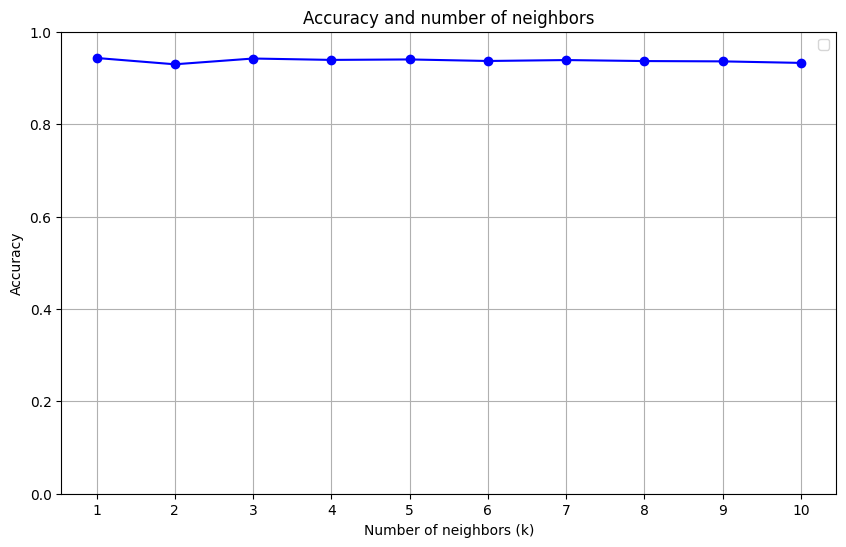

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(k_values, list(accuracies.values()), marker='o', color='b')
plt.title("Accuracy and number of neighbors")
plt.xlabel("Number of neighbors (k)")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid()
plt.ylim(0, 1)
plt.legend()
plt.show()